### Dataset:

каждая строка - экземпляр компании на IPO, каждый столбец - признак (feature).  Размер датасета (2046, 47)

Последний столбец представляет собой таргет - частное от деления стоимости акции на 250 день и стоимости акции на 1 день
То есть значение Target показывает, во сколько раз цена на акцию вырастет через год после IPO.

1. найти зависимости между фичами и таргетом,
2. прокроссвалидировать результат, можно попробовать любые алгоритмы

### Выводы по датасету:
1. mean(Target)=1.099045, std(Target)=0.87. Таким образом, у Target большой разброс относительно ср.зн.
2. Target слабо коррелирован с признаками, коэффициент коррелиции < 0.1
3. В датасете есть коррелированные между собой призанки с коэффицентов корр. > 0.7
4. Если в моделях классификации в качестве позитивных брать значения, у которых Target>2 (акция удваивается за год), то мы имеем дело с несбалансированной выборкой (9.2% данных имеют Target>2). 
Поэтому нужно понимать, что метрика 'Accuracy'не подходит. Тем не менее для начала можно её попробовать. Далее нужно брать метрики на основе 'precision' и 'recall'

### Выводы по моделям регресии:
Для моделей регрессии взята метрика 'mean absolute error' (MAE), как менее чувствительная к выбросам.

|Модель        |Mean Absolute Error|
|--------------|-------------------|
|DecisionTree  | 0.56              |
|RandomForest  | 0.59              |
|XGBoost       | 0.52              |

### Выводы по моделям классификации


### Предположения относительно нейронных сетей (Deep Learning)
- DL даёт преимещество, когда используется большое количесвто признаков. Например в датасете с Kaggle для каждой акции есть 300 признаков с меткой YearBeforeIPO
- для борьбы с переобучением можно использовать Dropout регуляризацию

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
ipo_file_path = 'Test.csv'
ipo_data = pd.read_csv(ipo_file_path, index_col=0)

In [3]:
print('dataset size = ', ipo_data.shape)
ipo_data.head()

dataset size =  (2046, 47)


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,Target
0,1,0,1,0.400876,-0.828236,0.054252,-0.563181,0.449091,0.235577,0.061438,...,0,0,0,0,0,1,0,0,0,0.708380
1,1,1,1,0.470136,-0.089750,0.025410,-0.081065,0.128571,0.033837,0.076672,...,0,0,0,0,0,0,0,1,0,0.290237
2,1,1,1,0.501639,-0.124612,0.033629,-0.117161,0.332229,0.100585,0.049234,...,0,0,0,0,0,0,0,1,0,0.990991
3,1,1,1,0.452561,-0.101908,0.033335,-0.095239,0.164426,0.083417,0.012057,...,0,0,0,0,0,1,0,0,0,0.954089
4,1,1,1,0.521170,-0.012306,0.004362,-0.012231,0.495039,0.330732,0.052344,...,0,0,0,1,0,0,0,0,0,0.031333


In [4]:
ipo_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,Target
count,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,...,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.00000,2046.000000,2046.000000,2046.000000,2046.000000
mean,0.482405,0.453079,0.585044,0.466797,-0.104694,0.036623,-0.083677,0.244953,0.162252,0.083395,...,0.098240,0.035679,0.048387,0.124633,0.258553,0.07869,0.026393,0.278592,0.007820,1.099045
std,0.499812,0.497915,0.492835,0.210250,0.251182,0.048347,0.176746,0.257697,0.153022,0.083517,...,0.297712,0.185535,0.214635,0.330384,0.437947,0.26932,0.160340,0.448416,0.088107,0.867110
min,0.000000,0.000000,0.000000,-1.845143,-4.362884,-0.020262,-2.992849,-3.411649,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.014423
25%,0.000000,0.000000,0.000000,0.430165,-0.104022,0.008891,-0.087461,0.124015,0.006404,0.023317,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.611263
50%,0.000000,0.000000,1.000000,0.508008,-0.042302,0.028372,-0.033346,0.315480,0.131005,0.056960,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.948420
75%,1.000000,1.000000,1.000000,0.537747,-0.008966,0.049580,-0.007953,0.410985,0.282121,0.118028,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,1.357186
max,1.000000,1.000000,1.000000,1.658905,0.263475,1.008219,0.179231,0.788901,0.837390,0.801006,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,12.304839


In [5]:
ipo_data.Target.describe()

count    2046.000000
mean        1.099045
std         0.867110
min         0.014423
25%         0.611263
50%         0.948420
75%         1.357186
max        12.304839
Name: Target, dtype: float64

В среднем через год после IPO акции вырастают в 1.1 раз, но относительно этого роста большой разброс (стандарное отклонение 0.87)

# Исследование датасета
## Target distribution

Target statistics:
count    2046.000000
mean        1.099045
std         0.867110
min         0.014423
25%         0.611263
50%         0.948420
75%         1.357186
max        12.304839
Name: Target, dtype: float64
38.6% данных имеют Target>1.099
9.2% данных имеют Target>2.000
2.4% данных имеют Target>3.000


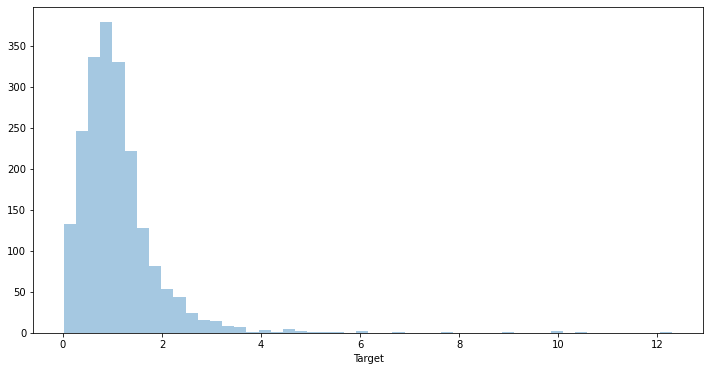

In [6]:
def print_target_stat(y, threshold=3):
    print(f'{y[y>threshold].count()/y.count():.1%} данных имеют Target>{threshold:.3f}')

y = ipo_data['Target']

f, ax = plt.subplots(figsize=(12, 6))
sns.distplot(a=ipo_data['Target'], kde=False)
# print(f'Среднее значение Target = {y.mean():.4}')
print('Target statistics:', y.describe(), sep='\n')
for tr in [y.mean(), 2, 3]:
    print_target_stat(y, threshold=tr)

## Distribution of Features

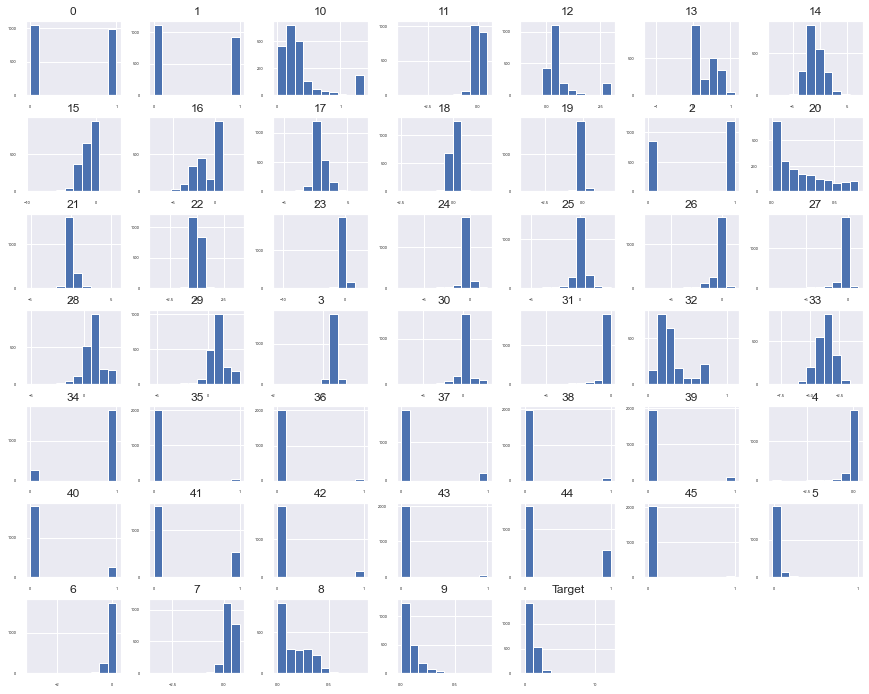

In [10]:
#  Plot a histogram for all the columns of the dataframe. This shows the frequency of values in all the columns
sns.set()
ipo_data.hist(sharex = False, sharey = False, xlabelsize = 4, ylabelsize = 4, figsize=(15, 12))
plt.show()

## Корреляция признаков


**Plotting a diagonal correlation matrix**

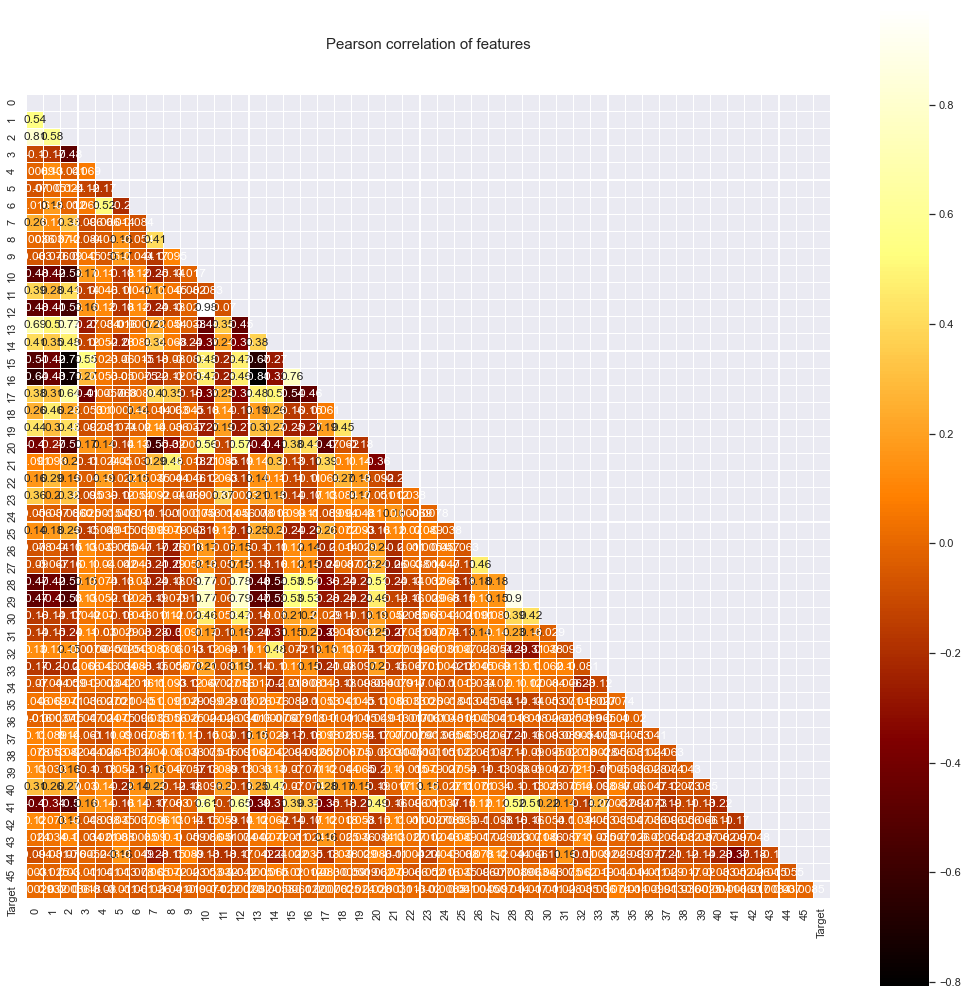

In [11]:
corr = ipo_data.corr()
colormap = plt.cm.afmhot
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(18,18))
plt.title('Pearson correlation of features', y=1.05, size=15)
sns.heatmap(corr,mask=mask, linewidths=0.1, square=True, 
            cmap=colormap, linecolor='white', annot=True)
plt.show()

Text(0.5, 0, 'Feature')

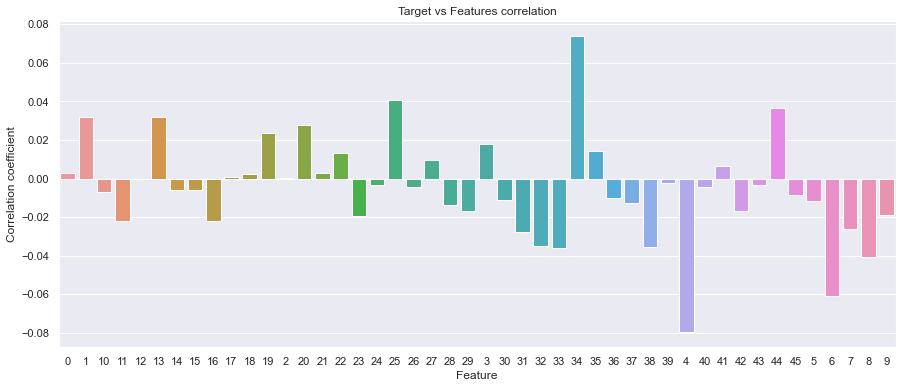

In [29]:
corr['Target']

plt.figure(figsize=(15,6))

plt.title("Target vs Features correlation")
sns.barplot(x=corr[:-1].index, y=corr['Target'][:-1])
plt.ylabel("Сorrelation coefficient")
plt.xlabel("Feature")

Положительно-коррелированные признаки, corr>.7

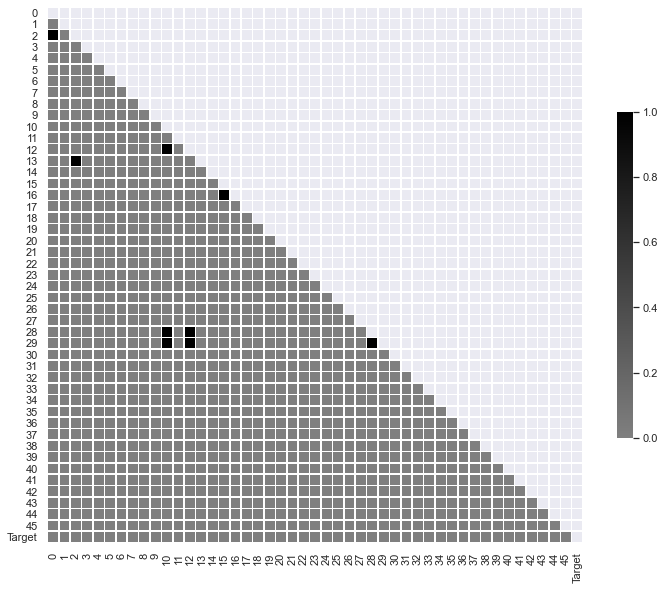

In [30]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr>.7, mask=mask, cmap='binary', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Отрицательно-коррелированные признаки, corr<-.7

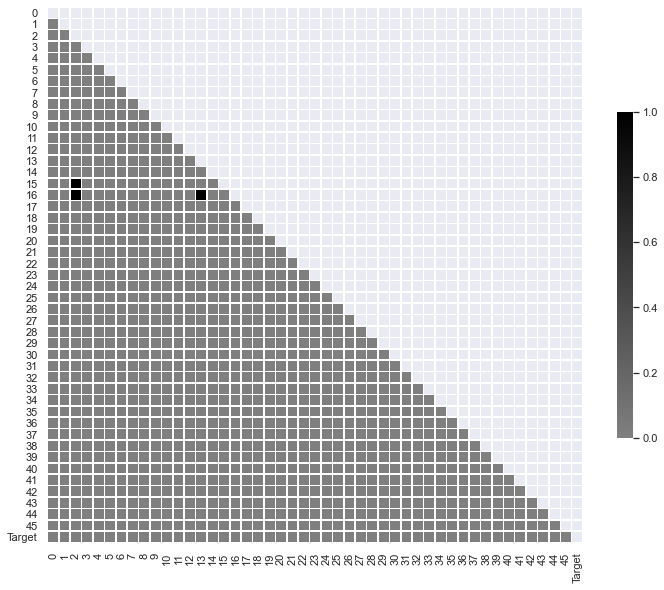

In [31]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr<-.7, mask=mask, cmap='binary', center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Choosing Features

In [32]:
y = ipo_data['Target']
# use all columns except the target as features
X = ipo_data.drop('Target', axis=1)

In [33]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
count,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,...,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.00000,2046.000000,2046.000000,2046.000000
mean,0.482405,0.453079,0.585044,0.466797,-0.104694,0.036623,-0.083677,0.244953,0.162252,0.083395,...,0.015152,0.098240,0.035679,0.048387,0.124633,0.258553,0.07869,0.026393,0.278592,0.007820
std,0.499812,0.497915,0.492835,0.210250,0.251182,0.048347,0.176746,0.257697,0.153022,0.083517,...,0.122185,0.297712,0.185535,0.214635,0.330384,0.437947,0.26932,0.160340,0.448416,0.088107
min,0.000000,0.000000,0.000000,-1.845143,-4.362884,-0.020262,-2.992849,-3.411649,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.430165,-0.104022,0.008891,-0.087461,0.124015,0.006404,0.023317,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.508008,-0.042302,0.028372,-0.033346,0.315480,0.131005,0.056960,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.537747,-0.008966,0.049580,-0.007953,0.410985,0.282121,0.118028,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.658905,0.263475,1.008219,0.179231,0.788901,0.837390,0.801006,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


# Модели регресии
## DecisionTreeRegressor Model

In [34]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [35]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state = 0)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [2, 4, 8, 16, 32, 64, 128]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print(f"Max leaf nodes: {max_leaf_nodes}  \t\t Mean Absolute Error: {my_mae}")

Max leaf nodes: 2  		 Mean Absolute Error: 0.5609753178155974
Max leaf nodes: 4  		 Mean Absolute Error: 0.5610413664152658
Max leaf nodes: 8  		 Mean Absolute Error: 0.583530045469938
Max leaf nodes: 16  		 Mean Absolute Error: 0.5928068386069926
Max leaf nodes: 32  		 Mean Absolute Error: 0.6593288984879235
Max leaf nodes: 64  		 Mean Absolute Error: 0.6733447096934164
Max leaf nodes: 128  		 Mean Absolute Error: 0.7273743519398597


## DecisionTreeRegressor with CrossValidation

In [40]:
from sklearn.model_selection import cross_val_score


for max_leaf_nodes in [2, 4, 8, 16, 32, 64, 128]:
    scores = -1 * cross_val_score(DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0), X, y,
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    print(f'max_leaf_nodes={max_leaf_nodes}\t\tAverage MAE score (across experiments):{scores.mean()}')


max_leaf_nodes=2		Average MAE score (across experiments):0.538970760738375
max_leaf_nodes=4		Average MAE score (across experiments):0.5580509361101148
max_leaf_nodes=8		Average MAE score (across experiments):0.5694650951783539
max_leaf_nodes=16		Average MAE score (across experiments):0.5684504634082728
max_leaf_nodes=32		Average MAE score (across experiments):0.5990944612730509
max_leaf_nodes=64		Average MAE score (across experiments):0.6347417392702163
max_leaf_nodes=128		Average MAE score (across experiments):0.6908839250093636


## RandomForestRegressor

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [37]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                  random_state = 0)
for est in [1,5,10,20,40,50,75,100,150,200]:
    forest_model = RandomForestRegressor(n_estimators=est, random_state=1)
    forest_model.fit(train_X, train_y)
    preds = forest_model.predict(val_X)
    print(f'estimators={est}\t\t{mean_absolute_error(val_y, preds)}')

estimators=1		0.8161293564339189
estimators=5		0.6476643014742051
estimators=10		0.6178089856892439
estimators=20		0.593251809025027
estimators=40		0.589175459534692
estimators=50		0.5885077317810825
estimators=75		0.5869149881962548
estimators=100		0.5842304943894481
estimators=150		0.5862334666536222
estimators=200		0.5840466741903153


## RandomForestRegressor with CrossValidation

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

for est in [1,5,10,20,40,50,75,100,150,200]:
    # Multiply by -1 since sklearn calculates *negative* MAE
    scores = -1 * cross_val_score(RandomForestRegressor(n_estimators=est, random_state=0), X, y,
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    print(f'estimators={est}\t\tAverage MAE score (across experiments):{scores.mean()}')
# print("MAE scores:\n", scores)

estimators=1		Average MAE score (across experiments):0.8119454977043601
estimators=5		Average MAE score (across experiments):0.6487260492046805
estimators=10		Average MAE score (across experiments):0.6230698857632927
estimators=20		Average MAE score (across experiments):0.6060554681606626
estimators=40		Average MAE score (across experiments):0.5961138327288695
estimators=50		Average MAE score (across experiments):0.5923441166550751
estimators=75		Average MAE score (across experiments):0.59160015810236
estimators=100		Average MAE score (across experiments):0.5900102998507157
estimators=150		Average MAE score (across experiments):0.5883649502683855
estimators=200		Average MAE score (across experiments):0.5868350573192286


In [49]:
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
0.5868350573192286


## XGBoost

In [149]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor, cv, DMatrix, plot_importance
from sklearn.metrics import mean_absolute_error

In [150]:
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                  random_state = 0)

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.01)
my_model.fit(train_X, train_y,
            early_stopping_rounds=5, 
             eval_set=[(val_X, val_y)],
             verbose=False)

predictions = my_model.predict(val_X)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, val_y)))

Mean Absolute Error: 0.5592310999029974


#### Examine the importance of each feature column

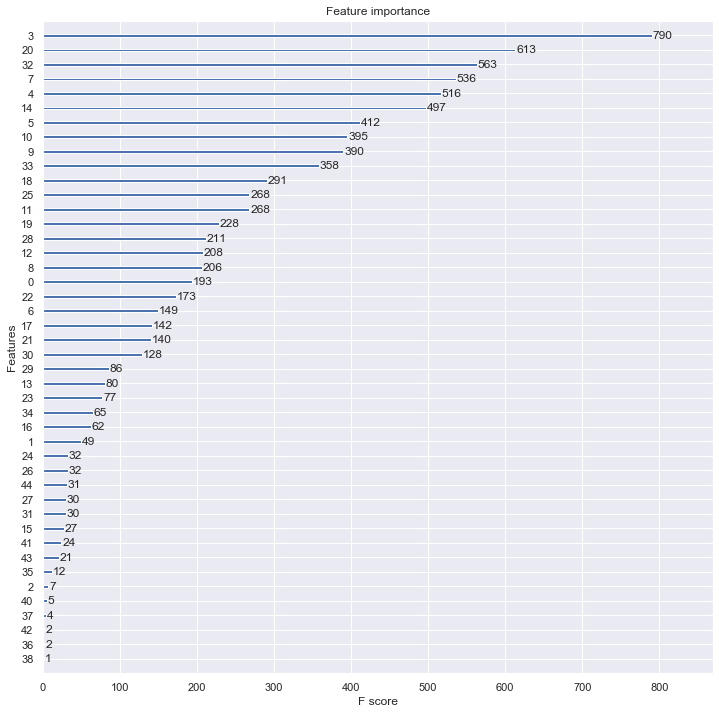

In [155]:
plot_importance(my_model)
plt.rcParams['figure.figsize'] = [16, 16]
plt.show()

## XGBoost with CrossValidation

In [143]:
data_dmatrix = DMatrix(data=X,label=y)

# for max_depth in [2,5,10,15,20,30,50,100]:

params = {"objective": 'reg:squarederror', 'colsample_bytree': .3, "learning_rate": 0.01,
         'max_depth': 10, 'alpha': 0}
cv_results = cv(dtrain=data_dmatrix, params=params, nfold=5,
                num_boost_round=1000,early_stopping_rounds=10,metrics="mae", 
                as_pandas=True, seed=123)
print((cv_results["test-mae-mean"]).tail(1))

137    0.5158
Name: test-mae-mean, dtype: float64


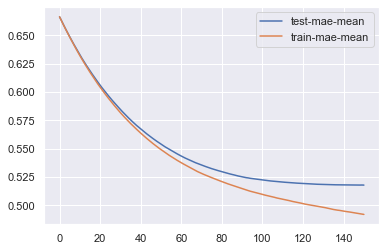

In [131]:
cv_results["test-mae-mean"].plot()
cv_results["train-mae-mean"].plot()
plt.legend()
plt.show()

# Модели классификации

## RandomForestClassifier

In [156]:
# from sklearn.metrics import SCORERS
# sorted(SCORERS.keys())

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

The dataset contains 2.4% positive samples and 97.6% negative samples


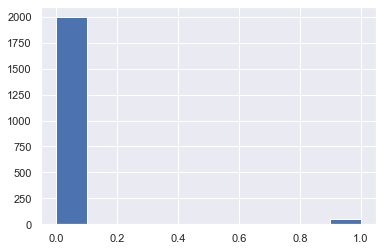

In [152]:
classes = (y>3).astype(int)
classes.hist()
print(f'The dataset contains {classes[classes==1].count()/classes.count():.1%} positive samples and \
{classes[classes==0].count()/classes.count():.1%} negative samples')

In [153]:
train_X, val_X, train_y, val_y = train_test_split(X, classes, train_size=0.8, test_size=0.2)

rfc_model = RandomForestClassifier(n_estimators=75)
rfc_model.fit(train_X, train_y)
pred_y = rfc_model.predict(val_X)
acc_rfc = accuracy_score(pred_y, val_y)
print(f'RandomForestClassifier accuracy_score = {acc_rfc:.1%}')

RandomForestClassifier accuracy_score = 97.1%


In [155]:
score = 'roc_auc'
for est in [1,5,10,20,40,50,75,100,150,200,300]:
    # Multiply by -1 since sklearn calculates *negative* MAE
    scores = cross_val_score(RandomForestClassifier(n_estimators=est, random_state=42),
                             X, classes,
                             cv=5,
                             scoring=score)
    print(f'estimators={est}\t\t{score}:{scores.mean():.1%}')


estimators=1		roc_auc:49.9%
estimators=5		roc_auc:53.7%
estimators=10		roc_auc:56.1%
estimators=20		roc_auc:58.8%
estimators=40		roc_auc:63.3%
estimators=50		roc_auc:64.1%
estimators=75		roc_auc:65.8%
estimators=100		roc_auc:64.4%
estimators=150		roc_auc:64.9%
estimators=200		roc_auc:64.8%
estimators=300		roc_auc:65.6%


## XGBClassifier

In [170]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, cv, DMatrix, plot_importance
from sklearn.metrics import mean_absolute_error


15    0.661191
Name: test-auc-mean, dtype: float64


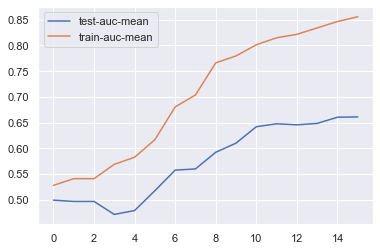

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.528208,0.029026,0.499468,0.006368
1,0.541224,0.038884,0.497005,0.008622
2,0.541224,0.038884,0.497005,0.008622
3,0.569077,0.079472,0.471782,0.053835
4,0.582849,0.104618,0.479295,0.038891
5,0.616965,0.099910,0.517823,0.095108
6,0.680551,0.091455,0.557768,0.082500
7,0.703744,0.106370,0.560170,0.091182
8,0.766212,0.070591,0.592462,0.086969
9,0.779655,0.068062,0.610227,0.075845


In [213]:
score = 'auc'

data_dmatrix = DMatrix(data=X,label=classes)

# for max_depth in [2,5,10,15,20,30,50,100]:

params = {#'n_estimators':500,
          "objective": 'binary:logistic',
          "learning_rate": 0.05,
          'gamma':0.1,
          'subsample':0.8,
          'colsample_bytree': 0.3, 
          'min_child_weight':3,
          'max_depth': 6,
          'seed': 100024}
cv_results = cv(dtrain=data_dmatrix, 
                params=params, 
                nfold=5,
                num_boost_round=1000,
                early_stopping_rounds=50, 
                metrics=score,
                as_pandas=True, 
                seed=123)
print((cv_results[f"test-{metr}-mean"]).tail(1))
cv_results[f"test-{metr}-mean"].plot()
cv_results[f"train-{metr}-mean"].plot()
plt.legend()
plt.show()
cv_results

In [ ]:
# https://github.com/dmlc/xgboost/issues/2064

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, classes, train_size=0.8, test_size=0.2, random_state=42)


params={
    'n_estimators':500,
    'objective': 'binary:logistic',
    'learning_rate': 0.05,
    'gamma':0.1,
    'subsample':0.8,
    'colsample_bytree':0.3,
    'min_child_weight':3,
    'max_depth':6,
    'seed':1024,
    }

clf = XGBClassifier(**params)
clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='auc', early_stopping_rounds = 50)


[0]	validation_0-auc:0.56209	validation_1-auc:0.54680
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.56209	validation_1-auc:0.54680
[2]	validation_0-auc:0.59139	validation_1-auc:0.60059
[3]	validation_0-auc:0.59139	validation_1-auc:0.60059
[4]	validation_0-auc:0.59115	validation_1-auc:0.60059
[5]	validation_0-auc:0.75904	validation_1-auc:0.72575
[6]	validation_0-auc:0.82867	validation_1-auc:0.73679
[7]	validation_0-auc:0.82702	validation_1-auc:0.73523
[8]	validation_0-auc:0.82702	validation_1-auc:0.73523
[9]	validation_0-auc:0.83713	validation_1-auc:0.76492
[10]	validation_0-auc:0.84233	validation_1-auc:0.75264
[11]	validation_0-auc:0.84362	validation_1-auc:0.74720
[12]	validation_0-auc:0.84115	validation_1-auc:0.74518
[13]	validation_0-auc:0.84166	validation_1-auc:0.74238
[14]	validation_0-auc:0.86574	validation_1-auc:0.76912
[15]	validation_0-auc:0.8654

KeyError: 'base_score'

KeyError: 'base_score'

In [216]:
from 
y_pred = clf.predict(X_test)
print(metrics.roc_auc_score(y_test,y_pred))

NameError: name 'metrics' is not defined